In [24]:
%load_ext autoreload
%autoreload 2


# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import scipy.cluster.hierarchy as sch

from utils import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Dataset
data = pd.read_csv("msdata.csv")
data.head()

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f4991,f4992,f4993,f4994,f4995,f4996,f4997,f4998,f4999,f5000
0,1,1,13.5668,10.9921,12.8019,18.8665,18.3896,13.8447,14.6832,13.6332,...,14.8549,14.6290,13.6823,16.4846,14.0313,14.5499,15.3994,15.8356,15.4092,10.9560
1,2,1,14.4608,10.0654,13.1336,20.1350,20.3564,14.9173,14.4468,14.0363,...,17.0840,14.5755,13.9338,18.4931,13.7288,14.4361,15.7231,15.6006,15.3425,13.7905
2,3,1,13.6018,11.3929,12.9640,20.3422,18.7408,14.3422,15.1872,13.3086,...,14.6561,14.7897,14.6149,16.3884,12.7930,14.0828,16.7488,16.3542,14.2886,13.2870
3,4,1,13.5682,9.8825,13.2593,19.4111,20.5106,13.7343,12.7313,13.7213,...,17.3763,14.5456,14.1032,17.5769,12.5236,15.0141,16.4015,14.5762,15.9415,8.4923
4,5,1,13.1236,11.6153,12.9775,20.2562,19.5410,14.7275,15.5866,13.0861,...,16.5775,14.5145,14.8090,18.0071,15.1559,14.2589,16.4705,15.9093,14.2622,11.4655


## Feature analysis

In [26]:
# check for missing values
data.isnull().sum().sum()

0

In [27]:
# check datatype of features
dtypes = [data[col].dtypes for col in data.columns[2:]]
set(dtypes)   

{dtype('float64')}

## Preprocessing

### Data dimension reduction

We can use Principal Component Analysis to reduce the dimensionality of the data while still keeping most of the variance of the original data.

PCA works by creating an eigendecomposition of the data matrix and transforming the data using the first k eigenvectors corresponding to the largest eigenvalues. 

In [28]:
datasets = ['zscore', 'minmax', 'mean']
datas_reduced_pca = [preprocess(data, method, reduce_method='pca', idx_cols=2, std_pca=True) for method in tqdm(datasets)]
datas_reduced_umap = [preprocess(data, method, reduce_method='umap', idx_cols=2, std_pca=True) for method in tqdm(datasets)]

100%|██████████| 3/3 [00:22<00:00,  7.47s/it]


In [29]:
datas_reduced_umap[0].head()

,0,1
0,5.037452,2.976909
1,5.065098,3.063727
2,5.052019,3.022607
3,5.040324,2.985957
4,5.063724,3.059398


In [30]:
datas_reduced_pca[0].head()

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
0,4.060148,0.053819,-0.440496,-1.294248,-0.780338,-0.772816,-0.322084,-1.360290,0.366810,-0.341980,...,-0.880634,-0.558915,0.880699,-0.184489,-0.085550,0.818241,0.174395,-0.224642,-0.583233,-0.279464
1,6.047729,-0.171761,-0.149295,-0.458312,-0.379447,-0.396087,-0.141022,-0.754580,0.047167,-0.282914,...,0.646984,0.763155,-0.062256,0.033958,0.531296,-0.961223,-0.269661,0.375362,0.395473,-0.574933
2,5.084755,-0.723180,-0.189662,-1.102593,-0.500653,-0.569251,-0.211487,-0.972087,0.271438,-0.324142,...,0.612811,0.986024,1.168851,0.399571,-0.096618,-0.363049,-0.346858,0.811825,0.490907,-1.407468
3,4.293924,0.717832,-0.558450,-1.168349,-0.883628,-0.889903,-0.437961,-1.632160,0.418093,-0.457527,...,-1.486786,-1.664031,-0.450461,-0.932415,-0.355531,0.274795,0.345128,-0.649037,-0.752121,1.296351
4,5.378514,-0.122484,-0.334849,-0.754225,-0.549033,-0.543837,-0.293847,-1.044577,0.294010,-0.174229,...,1.226518,0.537341,1.773614,0.018323,0.131065,-0.281450,-0.495081,0.619729,0.081761,-0.727220


In [31]:
# plot_hist(datas_reduced_umap[0])

## K-means clustering

100%|██████████| 12/12 [00:15<00:00,  1.33s/it]


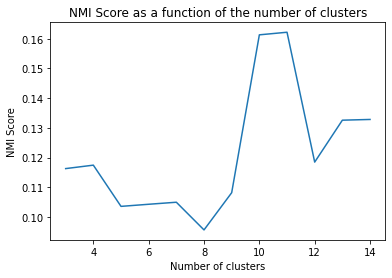

0.16215940045582147


In [32]:
scores = []
n_clusters = range(3, 15)
truth = data['class'].values - 1
for k in tqdm(n_clusters):
    preds, km = kmeans(data[data.columns.values[2:]], k)
    score = nmi(truth, preds, k)
    scores.append(score)
plt.plot(n_clusters, scores)
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI Score as a function of the number of clusters")
plt.show()

print(max(scores))

100%|██████████| 12/12 [00:02<00:00,  5.49it/s]


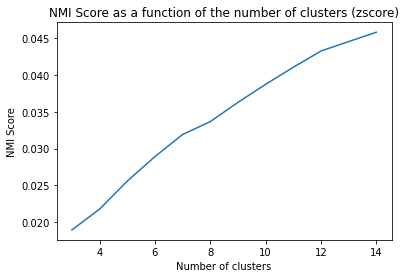

100%|██████████| 12/12 [00:02<00:00,  5.18it/s]


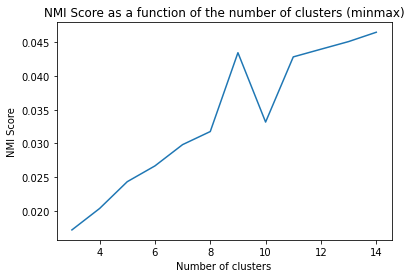

100%|██████████| 12/12 [00:02<00:00,  5.25it/s]


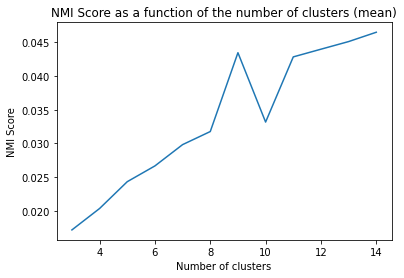

0.0464603574317743


In [33]:
for data_reduced, method in zip(datas_reduced_pca, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        preds, km = kmeans(data_reduced, k)
        score = nmi(truth, preds, k)
        scores.append(score)
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.show()

    print(max(scores))

100%|██████████| 12/12 [00:01<00:00,  7.88it/s]


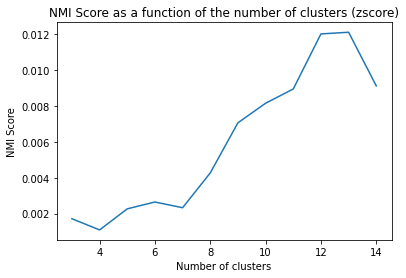

100%|██████████| 12/12 [00:01<00:00,  8.20it/s]


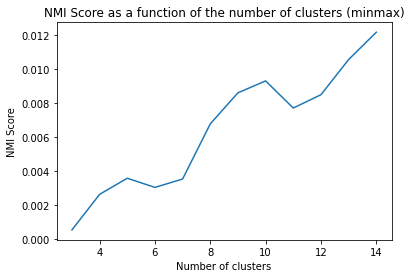

100%|██████████| 12/12 [00:01<00:00,  8.44it/s]


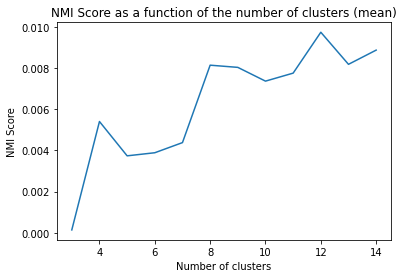

0.00973979312481909


In [34]:
best_preds = []
best_score = 1

for data_reduced, method in zip(datas_reduced_umap, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        preds, km = kmeans(data_reduced, k)
        score = nmi(truth, preds, k)
        scores.append(score)
        if score < best_score:
            best_score = score
            best_preds = preds
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.show()

    print(max(scores))

## Hierarchical clustering

In [36]:
linkages = ['single', 'complete', 'average']
linkages_func = [sch.single, sch.complete, sch.average]


In [37]:
scores_pca = {}
for d in datasets:
    scores_pca[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

for data_reduced, dataset in zip(datas_reduced_pca, datasets):
    n_clusters = range(3, 35)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        agglo_func(data_reduced, linkages, linkages_func, k, dataset, scores_pca, truth)
        # score = nmi(truth, preds, k)
        # scores.append(score)


100%|██████████| 32/32 [00:11<00:00,  2.71it/s]


In [38]:
scores_umap = {}
for d in datasets:
    scores_umap[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

for data_reduced, dataset in zip(datas_reduced_umap, datasets):
    n_clusters = range(3, 35)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        agglo_func(data_reduced, linkages, linkages_func, k, dataset, scores_umap, truth)
        # score = nmi(truth, preds, k)
        # scores.append(score)


100%|██████████| 32/32 [00:00<00:00, 35.91it/s]


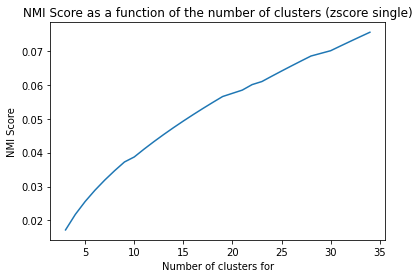

0.07551147330039513


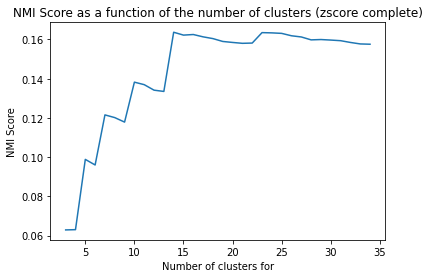

0.163675571652701


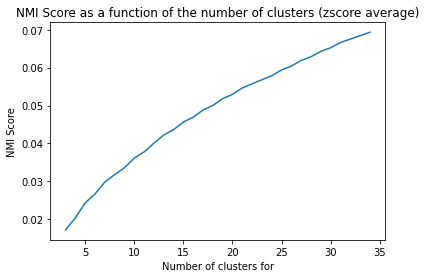

0.06933904884360065


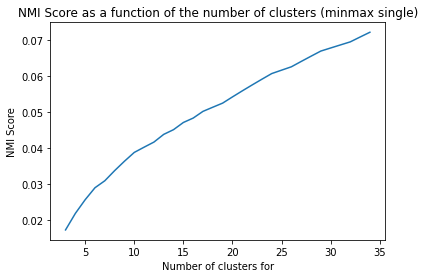

0.07210350630997889


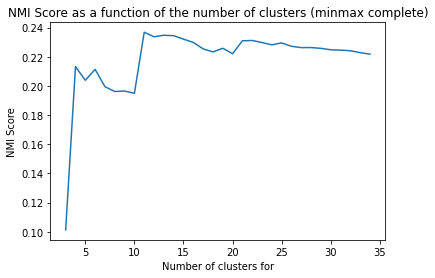

0.23676471415104638


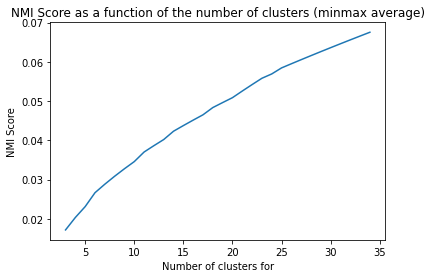

0.06752485135671314


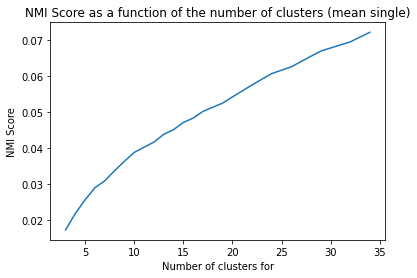

0.07210350630997889


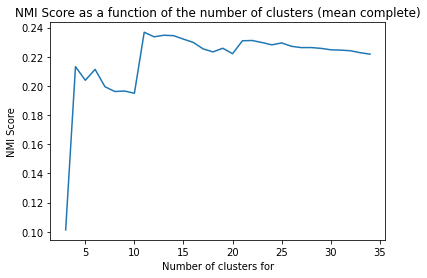

0.23676471415104638


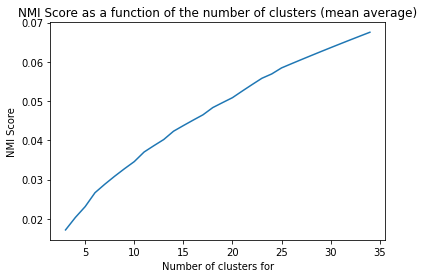

0.06752485135671314


In [39]:

for datas in scores_pca.keys():
    for link in scores_pca[datas].keys():
        score_arr = scores_pca[datas][link]
        plt.plot(n_clusters, score_arr)
        plt.xlabel("Number of clusters for")
        plt.ylabel("NMI Score")
        plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
        plt.show()
        print(max(score_arr))

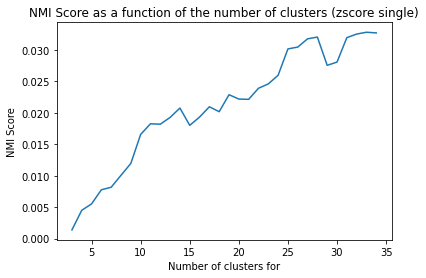

0.03282447838304997


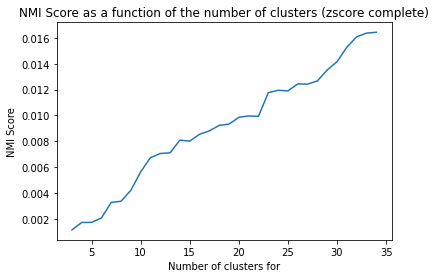

0.0164330651600129


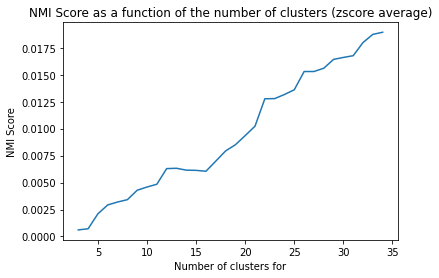

0.01893970620935004


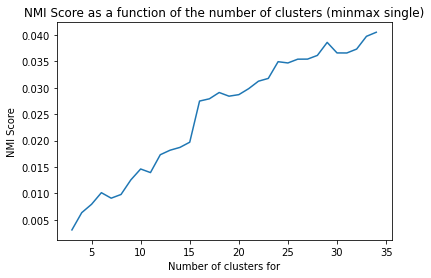

0.0404876751026488


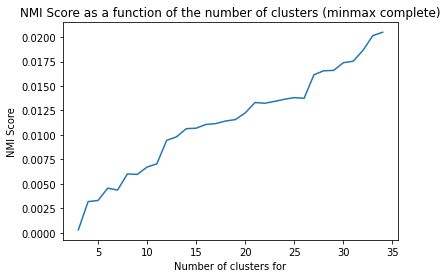

0.020486875175599325


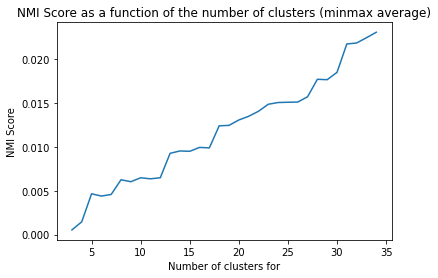

0.023076954604518703


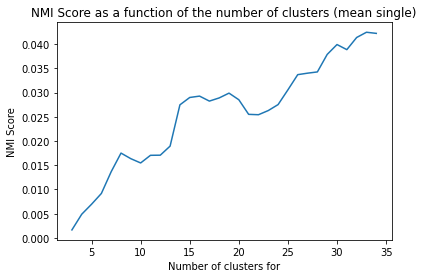

0.04244315778248267


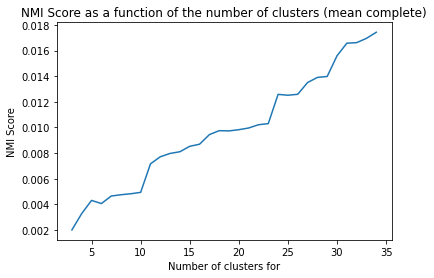

0.017437703595592765


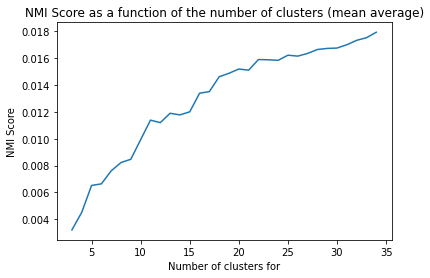

0.017939525011418506


In [40]:

for datas in scores_umap.keys():
    for link in scores_umap[datas].keys():
        score_arr = scores_umap[datas][link]
        plt.plot(n_clusters, score_arr)
        plt.xlabel("Number of clusters for")
        plt.ylabel("NMI Score")
        plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
        plt.show()
        print(max(score_arr))

### Without preprocessing

In [41]:
score_np = {'data': {}}
score_np['data'] = dict(zip(linkages, [[] for x in range(len(linkages))]))

In [42]:
for k in tqdm(n_clusters):
    agglo_func(data, linkages, linkages_func, k, 'data', score_np, truth)

100%|██████████| 32/32 [01:35<00:00,  2.99s/it]


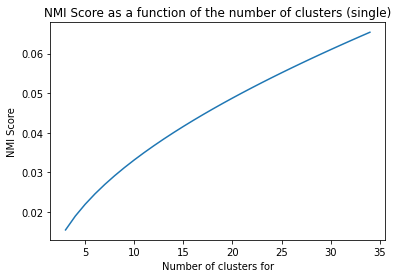

0.06537660643630418


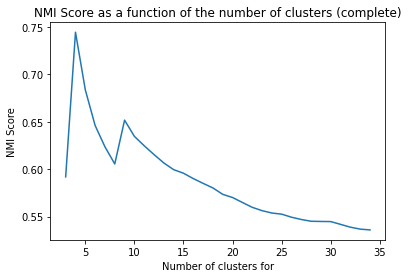

0.7442233206561474


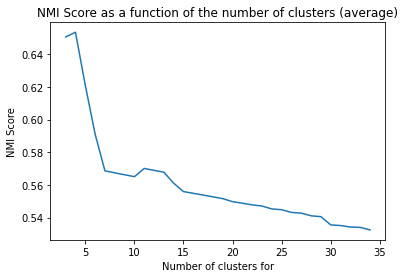

0.6534383999045306


In [43]:
for link in score_np['data'].keys():
    score_arr = score_np['data'][link]
    plt.plot(n_clusters, score_arr)
    plt.xlabel("Number of clusters for")
    plt.ylabel("NMI Score")
    plt.title(f"NMI Score as a function of the number of clusters ({link})")
    plt.show()
    print(max(score_arr))

## DBSCAN

100%|██████████| 12/12 [00:03<00:00,  3.58it/s]


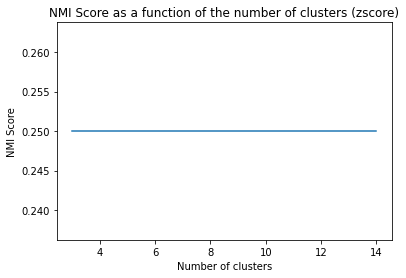

100%|██████████| 12/12 [00:07<00:00,  1.58it/s]


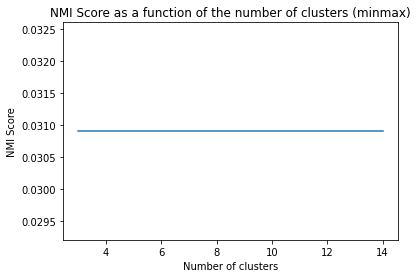

100%|██████████| 12/12 [00:08<00:00,  1.35it/s]


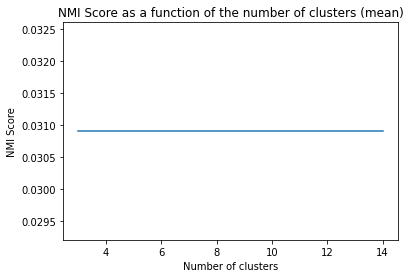

0.030908883558194433


In [45]:
for data_reduced, method in zip(datas_reduced_pca, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        preds, db = dbscan(data_reduced)
        score = nmi(truth, preds, k)
        scores.append(score)
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.show()

    print(max(scores))

100%|██████████| 12/12 [00:00<00:00, 109.29it/s]


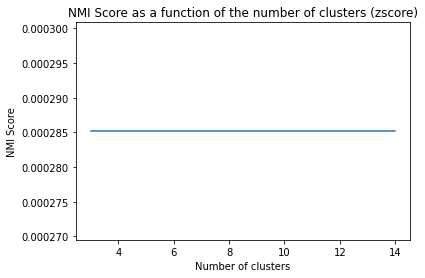

100%|██████████| 12/12 [00:00<00:00, 79.74it/s]0.0002851828772007909



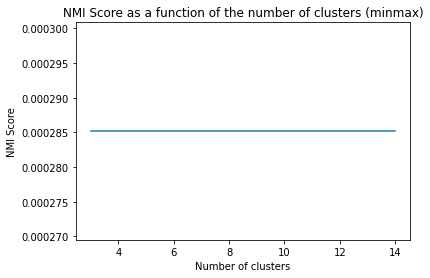

100%|██████████| 12/12 [00:00<00:00, 100.84it/s]
0.0002851828772007909


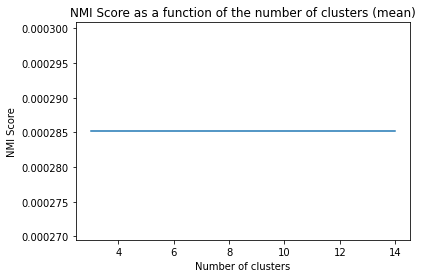

0.0002851828772007909


In [46]:
for data_reduced, method in zip(datas_reduced_umap, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = data['class'].values - 1
    for k in tqdm(n_clusters):
        preds, db = dbscan(data_reduced)
        score = nmi(truth, preds, k)
        scores.append(score)
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.show()

    print(max(scores))

### Without preprocessing